In [172]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import seaborn as sns

Теплофизические свойства при Т = 100С

In [173]:
Cp = 4216 #Дж/кг*К - вода
r = 2257200 #Дж/кг
ρ_w = 958.1 #м3/кг - вода
ρ_v = 0.597 #м3/кг - пар
η = 2790 / (10 ** 7) # Н*c/м2 - динамическая 
λ = 0.68
g = 9.8
ν = η / ρ_w #м2/с - кинематическая
σ = 0.05891 #Н/м - поверхностное натяжение
a_t = λ / (Cp * ρ_w)
ΔT = 7

In [174]:
Ja = (Cp * ΔT * ρ_w) / (r * ρ_v)
Ja0 = (Cp * ρ_w) / (r * ρ_v)
Pr = (η * Cp) / λ
Ar = (g / (ν ** 2)) * ((σ / (g * ρ_w)) ** (3 / 2))
K = ((Ja / Pr) ** 2) / Ar
K

8.101602369249181e-05

In [175]:
d0 = 0.148 * math.sqrt(1 + 100000 * K) * math.sqrt(σ / (g * ρ_w))
d0

0.0011183988141086206

In [64]:
d0_b = 0.148 * math.sqrt(1 + 100000 * K)
d0_b

0.44649915822544844

Теоретическая зависимость безразмерного диаметра от перепада температур

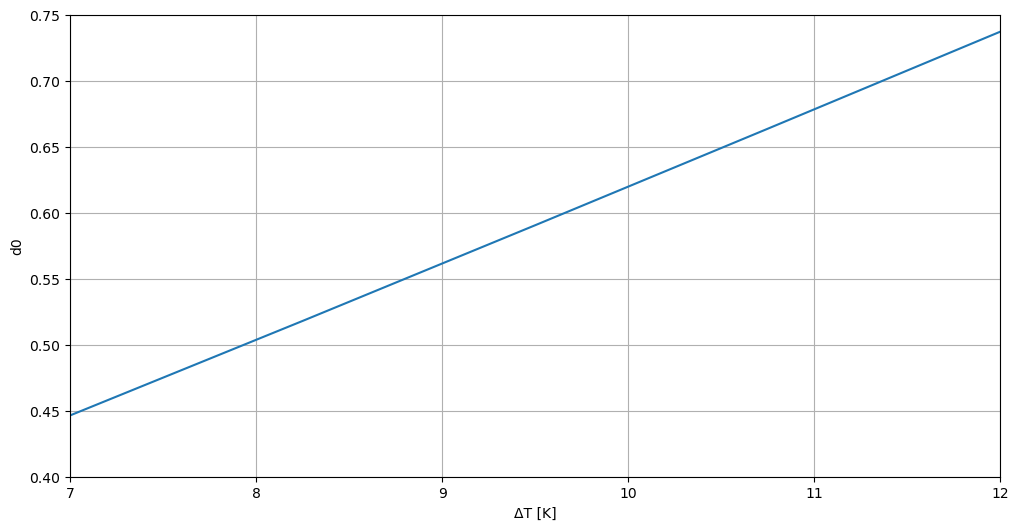

In [104]:
x = np.linspace(7, 12, 5)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, 0.148 * np.sqrt(1 + 100000 * (((((Cp * x * ρ_w) / (r * ρ_v)) / Pr) ** 2) / Ar)))
ax.set_xlabel('ΔT [K]')
ax.set_ylabel('d0')
ax.axis([7, 12, 0.4, 0.75])
ax.grid(True)

Обработка экспериментальных данных

In [176]:
tests = pd.read_csv('28.02.2024 water d=3.csv', sep=';', header=1)
tests = tests.drop(columns=['Unnamed: 6', 'Замер.1', 'Сила тока, А.1', 'Напряжение, В.1', 'Температура, °С.1', 'Мощность, Вт.1', 'Плотность ТП, Вт/м2.1'])

In [177]:
tests = tests.drop(index=[16, 17])
tests

,Замер,"Сила тока, А","Напряжение, В","Температура, °С","Мощность, Вт","Плотность ТП, Вт/м2"
0,reg1,"31,6","2,647","99,3","83,6452","29598,44303"
1,reg2,"36,1","2,768","99,3","99,9248","35359,09413"
2,reg3,"38,6","2,847","99,3","109,8942","38886,83652"
3,reg4,"50,3","2,956","99,3","148,6868","52613,8712"
4,reg5,"54,4","3,067","99,3","166,8448","59039,20736"
5,reg6,"58,2","3,17","99,3","184,494","65284,50106"
6,reg7,"61,7","3,28","99,4","202,376","71612,17268"
7,reg8,"63,9","3,37","99,3","215,343","76200,63694"
8,reg9,66,"3,472","99,4","229,152","81087,04883"
9,reg10,"70,7","3,577","99,4","252,8939","89488,28733"


In [178]:
tests = tests.set_index('Замер')
tests

,"Сила тока, А","Напряжение, В","Температура, °С","Мощность, Вт","Плотность ТП, Вт/м2"
Замер,,,,,
reg1,"31,6","2,647","99,3","83,6452","29598,44303"
reg2,"36,1","2,768","99,3","99,9248","35359,09413"
reg3,"38,6","2,847","99,3","109,8942","38886,83652"
reg4,"50,3","2,956","99,3","148,6868","52613,8712"
reg5,"54,4","3,067","99,3","166,8448","59039,20736"
reg6,"58,2","3,17","99,3","184,494","65284,50106"
reg7,"61,7","3,28","99,4","202,376","71612,17268"
reg8,"63,9","3,37","99,3","215,343","76200,63694"
reg9,66,"3,472","99,4","229,152","81087,04883"


In [179]:
tests.columns = ['I, A', 'U, V', 'T,°С', 'P, W', 'q, W/m2']

In [180]:
tests = tests.replace(',', '.', regex=True)
tests = tests.astype(float)

In [181]:
tests['ΔT'] = (tests['q, W/m2'] ** 0.3) / 3
tests

,"I, A","U, V","T,°С","P, W","q, W/m2",ΔT
Замер,,,,,,
reg1,31.6,2.647,99.3,83.6452,29598.44303,7.315759
reg2,36.1,2.768,99.3,99.9248,35359.09413,7.716655
reg3,38.6,2.847,99.3,109.8942,38886.83652,7.939982
reg4,50.3,2.956,99.3,148.6868,52613.87120,8.693784
reg5,54.4,3.067,99.3,166.8448,59039.20736,8.999552
reg6,58.2,3.170,99.3,184.4940,65284.50106,9.275168
reg7,61.7,3.280,99.4,202.3760,71612.17268,9.536188
reg8,63.9,3.370,99.3,215.3430,76200.63694,9.715526
reg9,66.0,3.472,99.4,229.1520,81087.04883,9.898382


In [182]:
tests['D0, m'] = [1368, 1556, 1909, 1824, 2285, 2303, 2400, 2497, 2438, 2854, 2697, 2883, 3010, 3027, 3150, 2914]
tests

,"I, A","U, V","T,°С","P, W","q, W/m2",ΔT,"D0, m"
Замер,,,,,,,
reg1,31.6,2.647,99.3,83.6452,29598.44303,7.315759,1368
reg2,36.1,2.768,99.3,99.9248,35359.09413,7.716655,1556
reg3,38.6,2.847,99.3,109.8942,38886.83652,7.939982,1909
reg4,50.3,2.956,99.3,148.6868,52613.87120,8.693784,1824
reg5,54.4,3.067,99.3,166.8448,59039.20736,8.999552,2285
reg6,58.2,3.170,99.3,184.4940,65284.50106,9.275168,2303
reg7,61.7,3.280,99.4,202.3760,71612.17268,9.536188,2400
reg8,63.9,3.370,99.3,215.3430,76200.63694,9.715526,2497
reg9,66.0,3.472,99.4,229.1520,81087.04883,9.898382,2438


In [183]:
tests = tests.rename(columns={'D0, m' : 'D0, mkm'})
tests.round(2)

,"I, A","U, V","T,°С","P, W","q, W/m2",ΔT,"D0, mkm"
Замер,,,,,,,
reg1,31.6,2.65,99.3,83.65,29598.44,7.32,1368
reg2,36.1,2.77,99.3,99.92,35359.09,7.72,1556
reg3,38.6,2.85,99.3,109.89,38886.84,7.94,1909
reg4,50.3,2.96,99.3,148.69,52613.87,8.69,1824
reg5,54.4,3.07,99.3,166.84,59039.21,9.00,2285
reg6,58.2,3.17,99.3,184.49,65284.50,9.28,2303
reg7,61.7,3.28,99.4,202.38,71612.17,9.54,2400
reg8,63.9,3.37,99.3,215.34,76200.64,9.72,2497
reg9,66.0,3.47,99.4,229.15,81087.05,9.90,2438


Добавляем на график теоретической зависимости экспериментальные данные

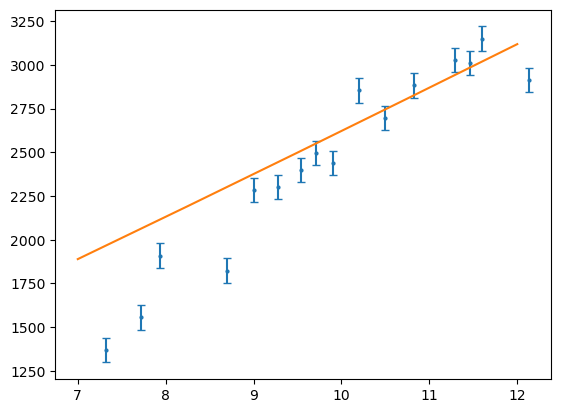

In [16]:
x = np.linspace(7, 12, 5)
graph, axes = plt.subplots()
axes.errorbar(tests['ΔT'], tests['D0, mkm'], yerr=70, fmt='o', capsize=3, markersize=2)
axes.plot(x, 0.25 * 1000000 * np.sqrt(1 + 100000 * (((((Cp * x * ρ_w) / (r * ρ_v)) / Pr) ** 2) / Ar)) * math.sqrt(σ / (g * ρ_w)))

Видно, что а=0,25 не особо подходит. Подбираем оптимальный параметр а:

In [20]:
def func(x, a):
    return a * 1000000 * np.sqrt(1 + 100000 * (((((Cp * x * ρ_w) / (r * ρ_v)) / Pr) ** 2) / Ar)) * math.sqrt(σ / (g * ρ_w))
popt, pcov = curve_fit(func, tests['ΔT'], tests['D0, mkm'])
a_opt = popt
D0_fit = func(tests['ΔT'], a_opt)
r2 = r2_score(tests['D0, mkm'], D0_fit)
r2

0.8048040789552211

Строим график с новым параметром а:

(7.0, 12.5, 1250.0, 3250.0)

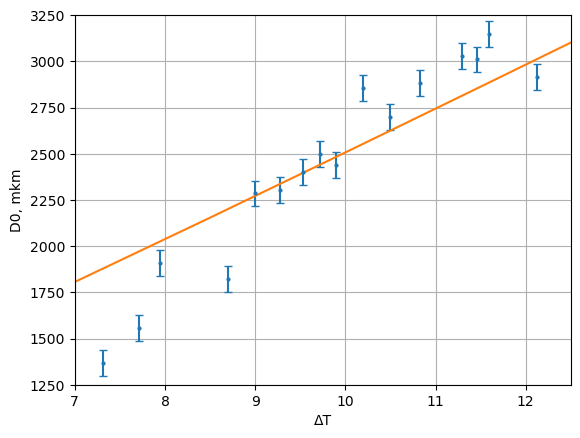

In [18]:
x = np.linspace(7, 13, 5)
graph, axes = plt.subplots()
axes.errorbar(tests['ΔT'], tests['D0, mkm'], yerr=70, fmt='o', capsize=3, markersize=2)
axes.plot(x, 0.239 * 1000000 * np.sqrt(1 + 100000 * (((((Cp * x * ρ_w) / (r * ρ_v)) / Pr) ** 2) / Ar)) * math.sqrt(σ / (g * ρ_w)))
axes.set_xlabel('ΔT')
axes.set_ylabel('D0, mkm')
axes.grid()
axes.axis([7, 12.5, 1250, 3250])

Возвращаемся к а=0,25

In [184]:
def func(x, a):
    return a * 1000000 * np.sqrt(1 + 100000 * (((((Cp * x * ρ_w) / (r * ρ_v)) / Pr) ** 2) / Ar)) * math.sqrt(σ / (g * ρ_w))
a_opt = 0.25
D0_fit = func(tests['ΔT'], a_opt)
r2 = r2_score(tests['D0, mkm'], D0_fit)
r2

0.7603153554404767

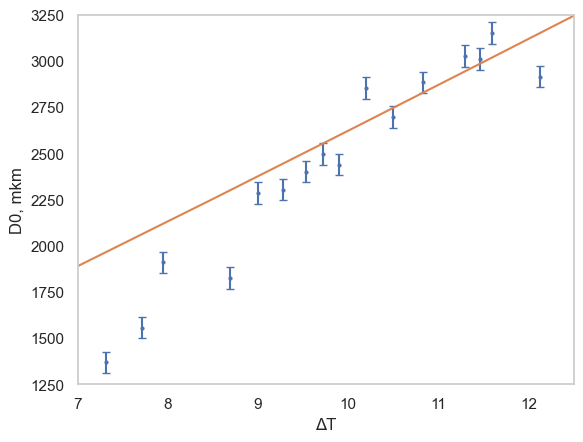

In [186]:
x = np.linspace(7, 13, 5)
graph, axs = plt.subplots()
axs.errorbar(tests['ΔT'], tests['D0, mkm'], yerr=58, fmt='o', capsize=3, markersize=2)
axs.plot(x, 0.25 * 1000000 * np.sqrt(1 + 100000 * (((((Cp * x * ρ_w) / (r * ρ_v)) / Pr) ** 2) / Ar)) * math.sqrt(σ / (g * ρ_w)))
axs.set_xlabel('ΔT')
axs.set_ylabel('D0, mkm')
axs.grid()
axs.axis([7, 12.5, 1250, 3250])
plt.savefig('D0 (a=0,25).png')

Рассчитываем отклонения экспериментальных значений от теоретических:

In [187]:
tests['D0_theory, mkm'] = 0.25 * 1000000 * np.sqrt(1 + 100000 * (((((Cp * tests['ΔT'] * ρ_w) / (r * ρ_v)) / Pr) ** 2) / Ar)) * math.sqrt(σ / (g * ρ_w))
tests['D0 deviation, %'] = abs(tests['D0, mkm'] - tests['D0_theory, mkm']) * 100 / tests['D0_theory, mkm']
tests['D0 deviation_mean, %'] = tests['D0 deviation, %'].mean()
tests

,"I, A","U, V","T,°С","P, W","q, W/m2",ΔT,"D0, mkm","D0_theory, mkm","D0 deviation, %","D0 deviation_mean, %"
Замер,,,,,,,,,,
reg1,31.6,2.647,99.3,83.6452,29598.44303,7.315759,1368,1965.223225,30.389587,8.367649
reg2,36.1,2.768,99.3,99.9248,35359.09413,7.716655,1556,2062.237544,24.547974,8.367649
reg3,38.6,2.847,99.3,109.8942,38886.83652,7.939982,1909,2116.487982,9.803409,8.367649
reg4,50.3,2.956,99.3,148.6868,52613.87120,8.693784,1824,2300.533372,20.714039,8.367649
reg5,54.4,3.067,99.3,166.8448,59039.20736,8.999552,2285,2375.544882,3.811542,8.367649
reg6,58.2,3.170,99.3,184.4940,65284.50106,9.275168,2303,2443.311742,5.742687,8.367649
reg7,61.7,3.280,99.4,202.3760,71612.17268,9.536188,2400,2507.612322,4.291426,8.367649
reg8,63.9,3.370,99.3,215.3430,76200.63694,9.715526,2497,2551.855313,2.149625,8.367649
reg9,66.0,3.472,99.4,229.1520,81087.04883,9.898382,2438,2597.016665,6.123051,8.367649


In [189]:
tests = tests.round(2)

In [190]:
tests.to_excel('deviations.xlsx')

Скорость роста

In [191]:
growth = pd.read_csv('bubble growth2.csv', sep=';')

In [192]:
growth.columns = ['t1', 'd1', 't3', 'd3', 't8', 'd8', 't10', 'd10', 't12', 'd12', 't16', 'd16']

In [193]:
growth = growth.drop(index=0)

In [194]:
growth1 = growth[['t1', 'd1']]
growth3 = growth[['t3', 'd3']]
growth8 = growth[['t8', 'd8']]
growth10 = growth[['t10', 'd10']]
growth12 = growth[['t12', 'd12']]
growth16 = growth[['t16', 'd16']]

In [195]:
growth1 = growth1.dropna()
growth3 = growth3.dropna()
growth8 = growth8.dropna()
growth10 = growth10.dropna()
growth12 = growth12.dropna()
growth16 = growth16.dropna()

In [196]:
growth1 = growth1.astype('int32')
growth3 = growth3.astype('int32')
growth8 = growth8.astype('int32')
growth10 = growth10.astype('int32')
growth12 = growth12.astype('int32')
growth16 = growth16.astype('int32')

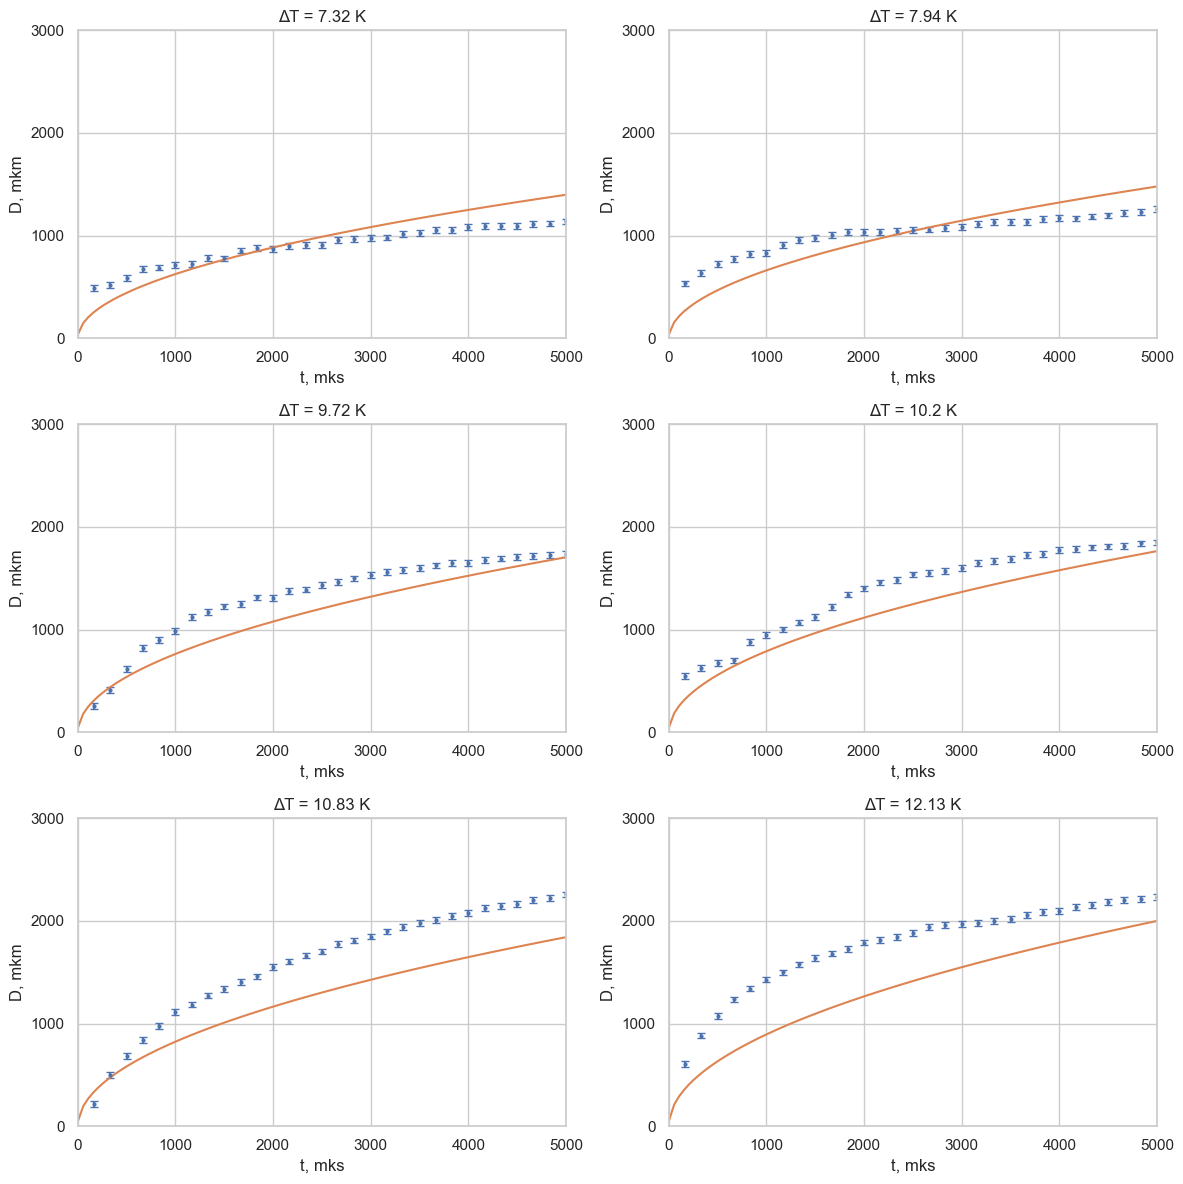

In [218]:
growth_data = [
    {'t': growth1['t1'], 'd': growth1['d1']},
    {'t': growth3['t3'], 'd': growth3['d3']},
    {'t': growth8['t8'], 'd': growth8['d8']},
    {'t': growth10['t10'], 'd': growth10['d10']},
    {'t': growth12['t12'], 'd': growth12['d12']},
    {'t': growth16['t16'], 'd': growth16['d16']}
]
for i in growth_data:
    i['t'] = i['t'].astype('int32')
    i['d'] = i['d'].astype('int32')
    
temperatures = [7.32, 7.94, 9.72, 10.2, 10.83, 12.13]
def growth_func(x, temper):
    return 2000000 * np.sqrt(a_t * x / 1000000) * (0.3 * ((Cp * temper * ρ_w) / (r * ρ_v)) + 
                                 np.sqrt(0.09 * (((Cp * temper * ρ_w) / (r * ρ_v)) ** 2) + 
                                           12 * ((Cp * temper * ρ_w) / (r * ρ_v))))
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[12, 12])
axes = axes.flatten()
titles = ['ΔT = 7.32 K', 'ΔT = 7.94 K', 'ΔT = 9.72 K', 'ΔT = 10.2 K', 'ΔT = 10.83 K', 'ΔT = 12.13 K']

for ax, data, tempr, tit in zip(axes, growth_data, temperatures, titles):
    x_set = np.linspace(5, 5000, 100) 
    y_set = growth_func(x_set, tempr)
    ax.errorbar(data['t'], data['d'],yerr=28, fmt='o', capsize=3, markersize=2)
    ax.set_xlabel('t, mks')
    ax.set_ylabel('D, mkm')
    ax.set_title(tit)
    ax.axis([0, 5000, 0, 3000])
    ax.plot(x_set, y_set)
    ax.set_xticks(ax.get_xticks()[::])
    ax.set_yticks(ax.get_yticks()[::2])

plt.tight_layout()
plt.savefig('Water d=3mm growth velocity.png')

Рассчитываем коэффициенты детерминации для скорости роста:

In [216]:
def combined_func(x):
    temper = all_data['temperature']
    return 2000000 * np.sqrt(a_t * x / 1000000) * (0.3 * ((Cp * temper * ρ_w) / (r * ρ_v)) + 
                                 np.sqrt(0.09 * (((Cp * temper * ρ_w) / (r * ρ_v)) ** 2) + 
                                          12 * ((Cp * temper * ρ_w) / (r * ρ_v))))
temperatures = [7.32, 7.94, 9.72, 10.2, 10.83, 12.13]
growth_data = [
    {'t': growth1['t1'], 'd': growth1['d1'], 'temperature' : 7.32},
    {'t': growth3['t3'], 'd': growth3['d3'], 'temperature' : 7.94},
    {'t': growth8['t8'], 'd': growth8['d8'], 'temperature' : 9.72},
    {'t': growth10['t10'], 'd': growth10['d10'], 'temperature' : 10.2},
    {'t': growth12['t12'], 'd': growth12['d12'], 'temperature' : 10.83},
    {'t': growth16['t16'], 'd': growth16['d16'], 'temperature' : 12.13}
]

d_fit = combined_func(all_data['t'])

R2 = r2_score(all_data['d'], d_fit)
print( R2)

0.69661424134343


Рассчитываем отклонения экспериментальных значений cкорости роста от теоретических:

In [76]:
growth1['d_theory, mkm'] = 2000000 * np.sqrt(a_t * growth1['t1'] / 1000000) * (0.3 * ((Cp * 7.32 * ρ_w) / (r * ρ_v)) + 
                                 np.sqrt(0.09 * (((Cp * 7.32 * ρ_w) / (r * ρ_v)) ** 2) + 
                                          12 * ((Cp * 7.32 * ρ_w) / (r * ρ_v))))
growth1['d deviation, %'] = abs(growth1['d1'] - growth1['d_theory, mkm']) * 100 / growth1['d_theory, mkm']
growth1['d deviation_mean, %'] = growth1['d deviation, %'].mean()
growth1['d deviation, %'].mean()

17.413863891227862

In [79]:
growth3['d_theory, mkm'] = 2000000 * np.sqrt(a_t * growth3['t3'] / 1000000) * (0.3 * ((Cp * 7.94 * ρ_w) / (r * ρ_v)) + 
                                 np.sqrt(0.09 * (((Cp * 7.94 * ρ_w) / (r * ρ_v)) ** 2) + 
                                          12 * ((Cp * 7.94 * ρ_w) / (r * ρ_v))))
growth3['d deviation, %'] = abs(growth3['d3'] - growth3['d_theory, mkm']) * 100 / growth3['d_theory, mkm']
growth3['d deviation_mean, %'] = growth3['d deviation, %'].mean()
growth3['d deviation, %'].mean()

20.30955043459202

In [80]:
growth8['d_theory, mkm'] = 2000000 * np.sqrt(a_t * growth8['t8'] / 1000000) * (0.3 * ((Cp * 9.72 * ρ_w) / (r * ρ_v)) + 
                                 np.sqrt(0.09 * (((Cp * 9.72 * ρ_w) / (r * ρ_v)) ** 2) + 
                                          12 * ((Cp * 9.72 * ρ_w) / (r * ρ_v))))
growth8['d deviation, %'] = abs(growth8['d8'] - growth8['d_theory, mkm']) * 100 / growth8['d_theory, mkm']
growth8['d deviation_mean, %'] = growth8['d deviation, %'].mean()
growth8['d deviation, %'].mean()

11.088496398129

In [81]:
growth10['d_theory, mkm'] = 2000000 * np.sqrt(a_t * growth10['t10'] / 1000000) * (0.3 * ((Cp * 10.2 * ρ_w) / (r * ρ_v)) + 
                                 np.sqrt(0.09 * (((Cp * 10.2 * ρ_w) / (r * ρ_v)) ** 2) + 
                                          12 * ((Cp * 10.2 * ρ_w) / (r * ρ_v))))
growth10['d deviation, %'] = abs(growth10['d10'] - growth10['d_theory, mkm']) * 100 / growth10['d_theory, mkm']
growth10['d deviation_mean, %'] = growth10['d deviation, %'].mean()
growth10['d deviation, %'].mean()

11.12289674864006

In [84]:
growth12['d_theory, mkm'] = 2000000 * np.sqrt(a_t * growth12['t12'] / 1000000) * (0.3 * ((Cp * 10.83 * ρ_w) / (r * ρ_v)) + 
                                 np.sqrt(0.09 * (((Cp * 10.83 * ρ_w) / (r * ρ_v)) ** 2) + 
                                          12 * ((Cp * 10.83 * ρ_w) / (r * ρ_v))))
growth12['d deviation, %'] = abs(growth12['d12'] - growth12['d_theory, mkm']) * 100 / growth12['d_theory, mkm']
growth12['d deviation_mean, %'] = growth12['d deviation, %'].mean()
growth12['d deviation, %'].mean()

24.760562092986092

In [85]:
growth16['d_theory, mkm'] = 2000000 * np.sqrt(a_t * growth16['t16'] / 1000000) * (0.3 * ((Cp * 12.13 * ρ_w) / (r * ρ_v)) + 
                                 np.sqrt(0.09 * (((Cp * 12.13 * ρ_w) / (r * ρ_v)) ** 2) + 
                                          12 * ((Cp * 12.13 * ρ_w) / (r * ρ_v))))
growth16['d deviation, %'] = abs(growth16['d16'] - growth16['d_theory, mkm']) * 100 / growth16['d_theory, mkm']
growth16['d deviation_mean, %'] = growth16['d deviation, %'].mean()
growth16['d deviation, %'].mean()

35.58047252664387

Histograms:

In [134]:
hist = pd.read_csv('histogram.csv', sep=';')
hist = hist[['regstat2', 'regstat6', 'regstat14']]
hist = hist.rename(columns={'regstat2': 'ΔT = 7.7 K', 'regstat6': 'ΔT = 9.3 K', 'regstat14': 'ΔT = 11.3 K'})

In [135]:
regstat2 = hist['ΔT = 7.7 K']
regstat6 = hist['ΔT = 9.3 K']
regstat14 = hist['ΔT = 11.3 K']

In [136]:
regstat2 = regstat2.dropna()
regstat6 = regstat6.dropna()
regstat14 = regstat14.dropna()

In [137]:
regstat2 = regstat2.astype('float')
regstat6 = regstat6.astype('float')
regstat14 = regstat14.astype('float')

In [138]:
regstat2

0       1866.2
1       1327.7
2        995.6
3       2028.5
4       1531.6
         ...  
3282     973.3
3283    1645.9
3284    1397.0
3285    1658.7
3286    1641.9
Name: ΔT = 7.7 K, Length: 3287, dtype: float64

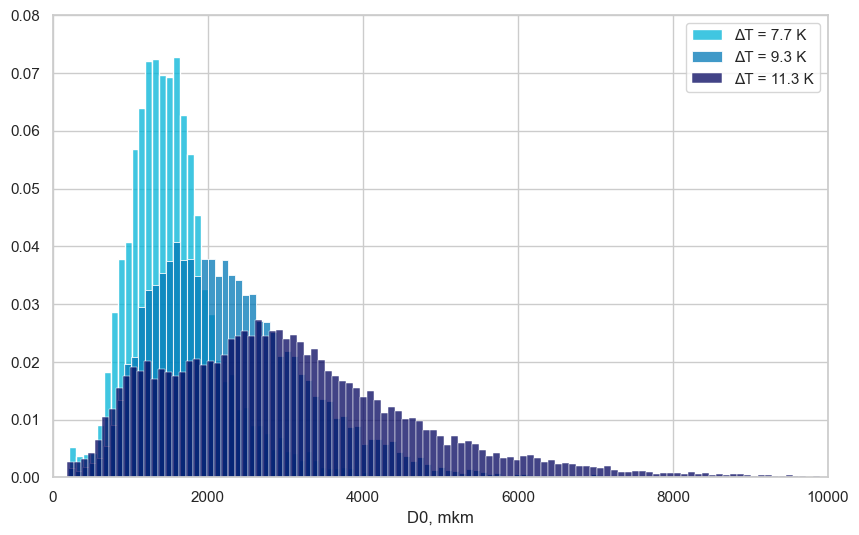

In [201]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.histplot(regstat2, label='ΔT = 7.7 K', color='#00B4D8', stat='probability', binwidth=90)
sns.histplot(regstat6, label='ΔT = 9.3 K', color='#0077b6', stat='probability', binwidth=90)
sns.histplot(regstat14, label='ΔT = 11.3 K', color='#03045e', stat='probability', binwidth=90)
plt.legend()
plt.xlabel('D0, mkm')
plt.ylabel('')
plt.axis([0, 10000, 0, 0.08])
plt.savefig('hists.png')

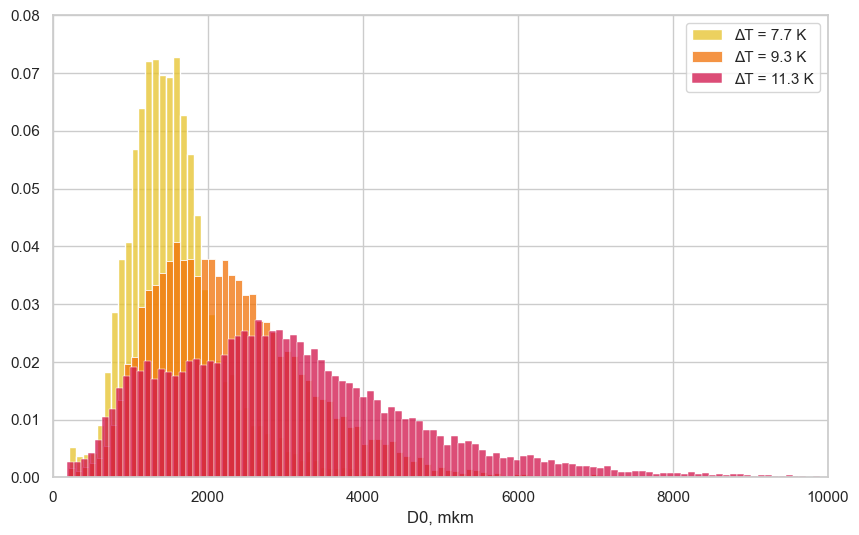

In [168]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.histplot(regstat2, label='ΔT = 7.7 K', color='#E6C229', stat='probability', binwidth=90)
sns.histplot(regstat6, label='ΔT = 9.3 K', color='#F17105', stat='probability', binwidth=90)
sns.histplot(regstat14, label='ΔT = 11.3 K', color='#D11149', stat='probability', binwidth=90)
plt.legend()
plt.xlabel('D0, mkm')
plt.ylabel('')
plt.axis([0, 10000, 0, 0.08])
plt.savefig('hists.png')

(0.0, 10000.0, 0.0, 0.08)

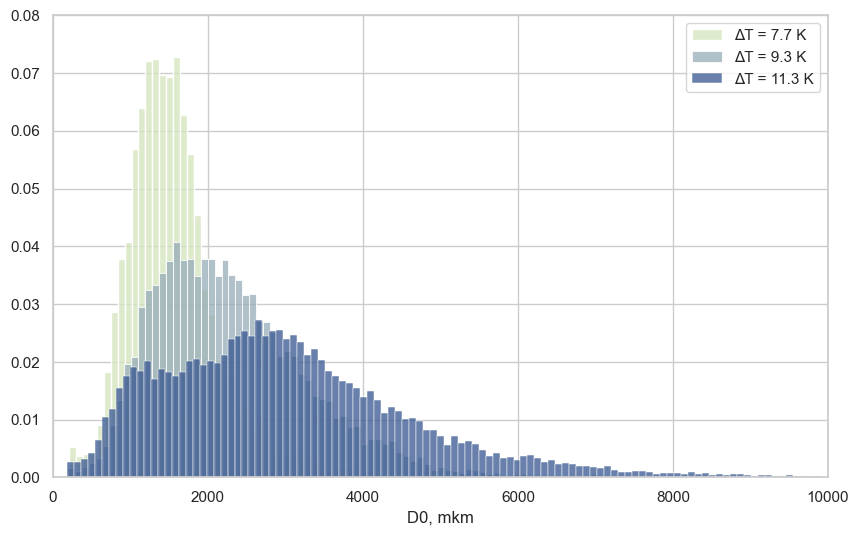

In [167]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.histplot(regstat2, label='ΔT = 7.7 K', color='#D4E4BC', stat='probability', binwidth=90)
sns.histplot(regstat6, label='ΔT = 9.3 K', color='#96ACB7', stat='probability', binwidth=90)
sns.histplot(regstat14, label='ΔT = 11.3 K', color='#36558F', stat='probability', binwidth=90)
plt.legend()
plt.xlabel('D0, mkm')
plt.ylabel('')
plt.savefig('hists.png')
plt.axis([0, 10000, 0, 0.08])

(0.0, 10000.0, 0.0, 0.08)

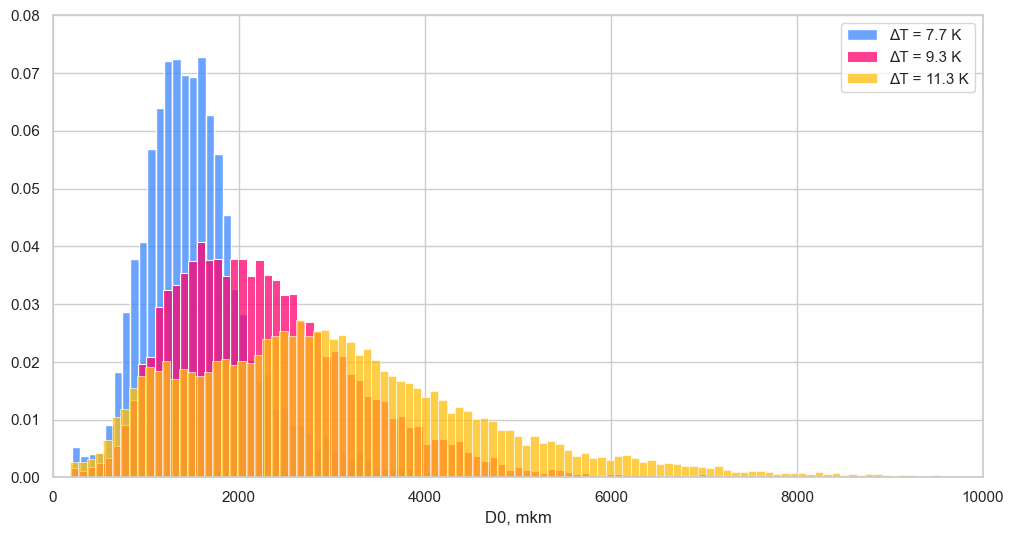

In [166]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.histplot(regstat2, label='ΔT = 7.7 K', color='#3a86ff', stat='probability', binwidth=90)
sns.histplot(regstat6, label='ΔT = 9.3 K', color='#ff006e', stat='probability', binwidth=90)
sns.histplot(regstat14, label='ΔT = 11.3 K', color='#ffbe0b', stat='probability', binwidth=90)
plt.legend()
plt.xlabel('D0, mkm')
plt.ylabel('')
plt.savefig('hists.png')
plt.axis([0, 10000, 0, 0.08])

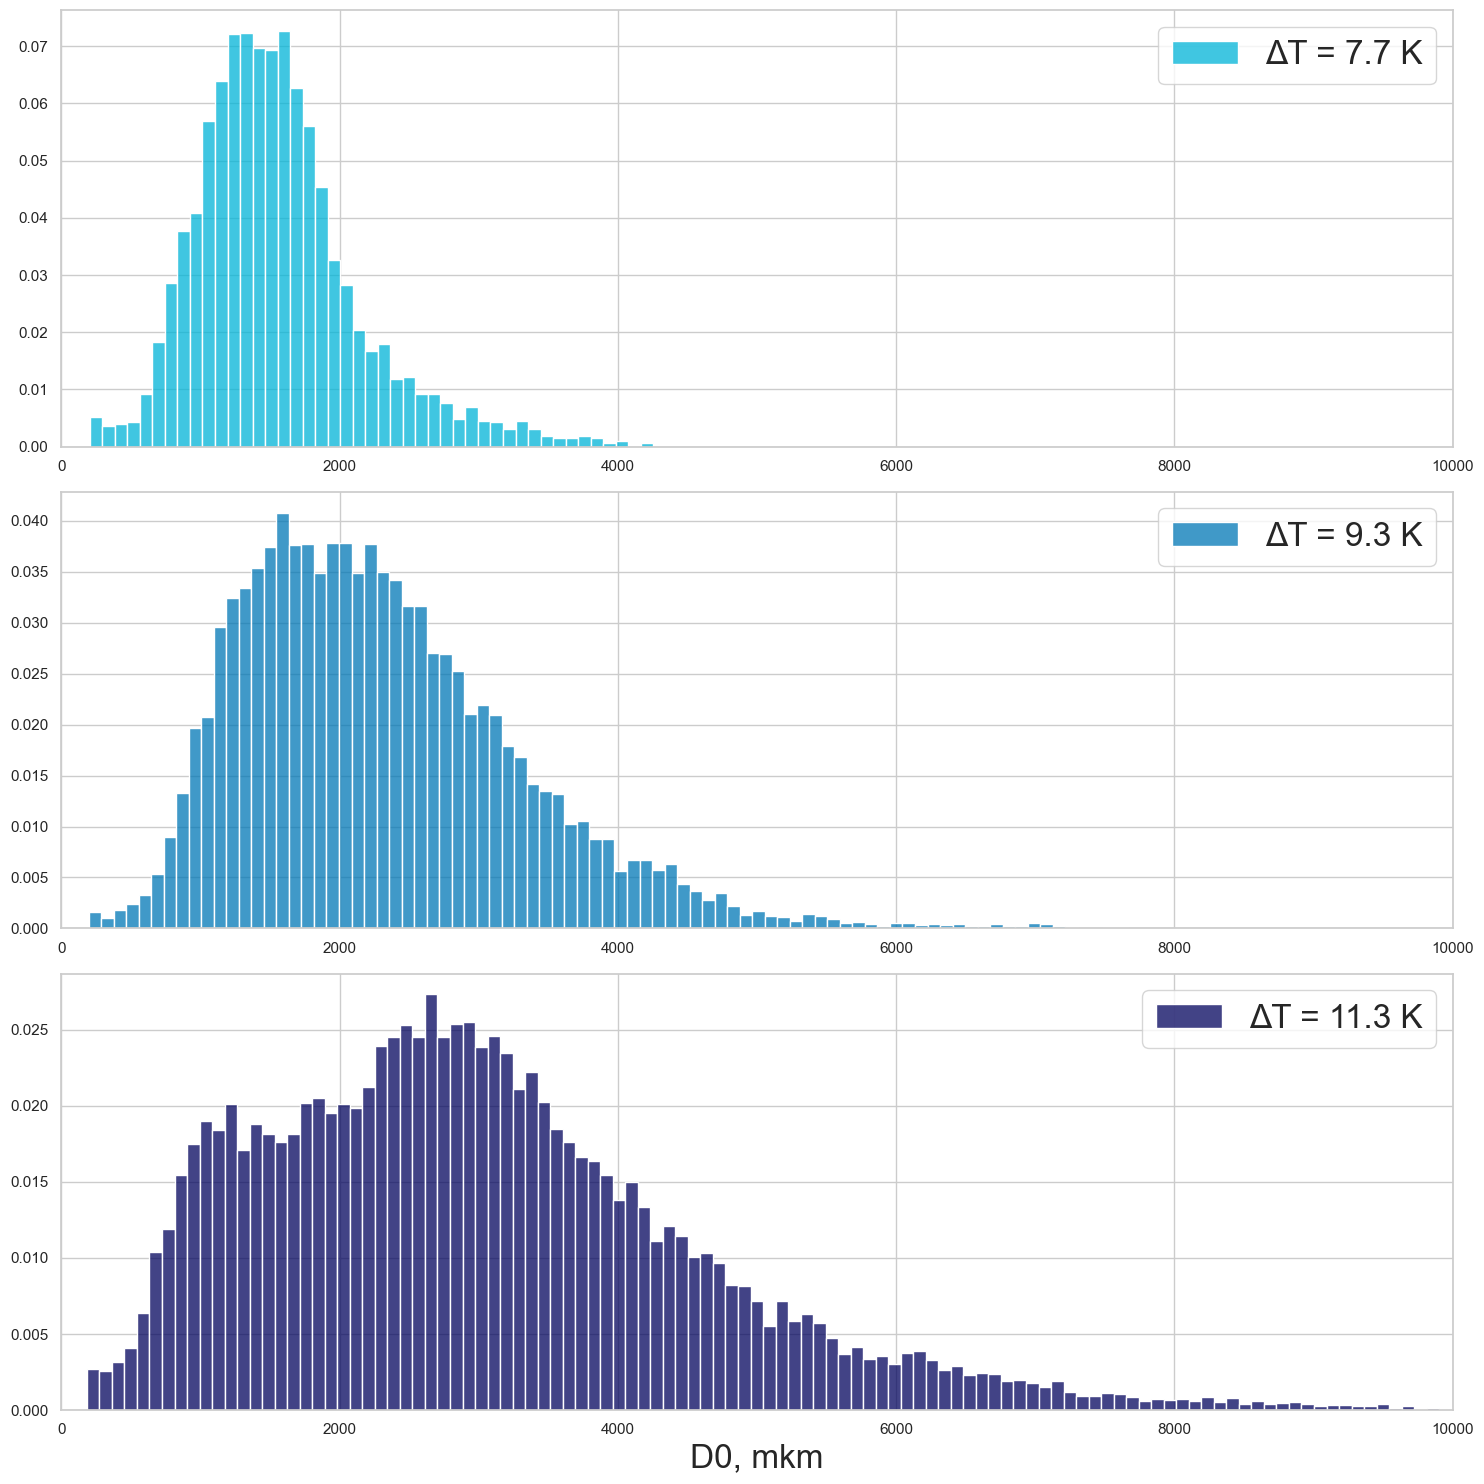

In [207]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.set_theme(style="whitegrid")
sns.histplot(regstat2, label='ΔT = 7.7 K', color='#00B4D8',stat='probability', edgecolor="1",
    linewidth=1, binwidth=90, ax=axes[0])
sns.histplot(regstat6, label='ΔT = 9.3 K',  color='#0077b6', stat='probability', edgecolor="1",
    linewidth=1, binwidth=90,  ax=axes[1])
sns.histplot(regstat14, label='ΔT = 11.3 K', color='#03045e',  stat='probability', edgecolor="1",
    linewidth=1, binwidth=90, ax=axes[2])
axes[0].legend(fontsize=24)
axes[1].legend(fontsize=24)
axes[2].legend(fontsize=24)
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[2].set_xlabel('D0, mkm', fontsize=24)
axes[0].set_xlim(0, 10000) 
axes[1].set_xlim(0, 10000)
axes[2].set_xlim(0, 10000)
plt.tight_layout()
plt.savefig('hists.png')
